In [1]:
!pip install torch
!pip install torchvision
!pip install matplotlib

In [2]:
# PyTorch Modules you need for this lab

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

In [3]:
# Other non-PyTorch Modules

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

In [ ]:
IMAGE_SIZE = 16

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [ ]:


transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
transforms.ToTensor()
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [6]:
# Enter your code here
dataset_train = dsets.FashionMNIST(root= '.fashion/data', train=True, transform=composed,  download=True)
dataset_val = dsets.FashionMNIST(root= '.fashion/data', train=False, transform=composed,  download=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 22636739.85it/s]


Extracting .fashion/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to .fashion/data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 355360.72it/s]


Extracting .fashion/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to .fashion/data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6251344.84it/s]


Extracting .fashion/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to .fashion/data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11222597.19it/s]


Extracting .fashion/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to .fashion/data/FashionMNIST/raw



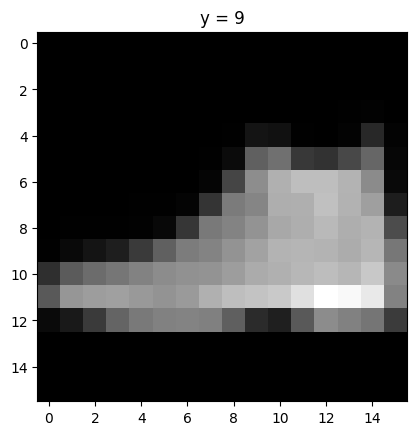

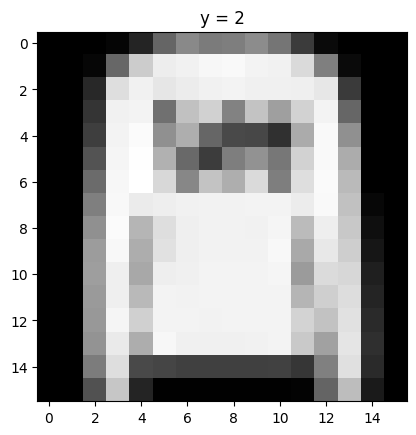

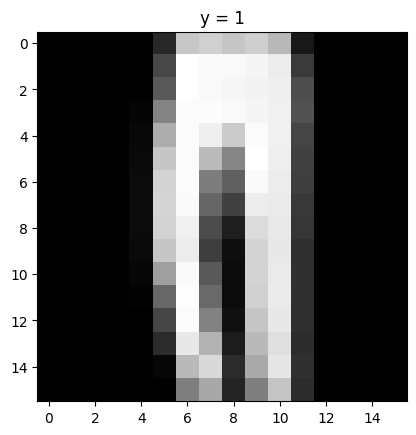

In [7]:
for n,data_sample in enumerate(dataset_val):

    show_data(data_sample)
    plt.show()
    if n==2:
        break 

In [8]:
class CNN_batch(nn.Module):
    
    # Constructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

In [9]:
class CNN(nn.Module):
    
    # Constructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

In [10]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

In [ ]:
model = CNN(out_1=16, out_2=32,number_of_classes=10)
model_batch =CNN_batch(out_1=16, out_2=32,number_of_classes=10)

In [ ]:
# Enter your code here
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)
optimizer_batch = torch.optim.SGD(params=model_batch.parameters(), lr=0.1)

In [ ]:
import time
def train(model, optimizer):
    start_time = time.time()

    cost_list=[]
    accuracy_list=[]
    N_test=len(dataset_val)
    n_epochs=5
    for epoch in range(n_epochs):
        cost=0
        model.train()
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            cost+=loss.item()
        correct=0
        #perform a prediction on the validation  data 
        model.eval()
        for x_test, y_test in test_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
        cost_list.append(cost)
    return cost_list, accuracy_list

In [ ]:
cost_list, acc_list = train(model, optimizer)
cost_list_batch, acc_list_batch = train(model_batch, optimizer_batch)

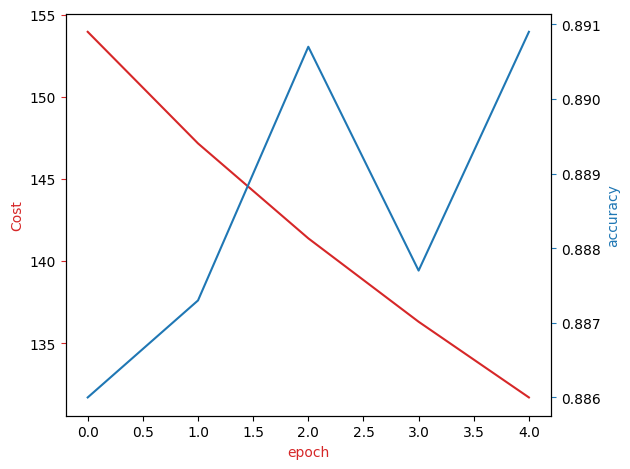

In [ ]:
def plot(cost_list, accuracy_list):
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(cost_list, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('Cost', color=color)
    ax1.tick_params(axis='y', color=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color) 
    ax2.set_xlabel('epoch', color=color)
    ax2.plot( accuracy_list, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()

In [ ]:
plot(cost_list, acc_list)

In [ ]:
plot(cost_list_batch, acc_list_batch)

dataset: https://github.com/zalandoresearch/fashion-mnist
